In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('labels.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df[df.isnull().any(axis=1)]

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
40,image_41.PNG,NaN,Me: Has seen every Marvel movie before Endgame:,very_funny,twisted_meaning,slight,motivational,positive
83,image_84.png,NaN,X-MEN VS AVENGERS MOVIE? AvengersMeme RUSH .....,very_funny,general,not_offensive,not_motivational,very_positive
114,image_115.jpg,NaN,One Does Not Simply Into Mordor Challenge Acce...,very_funny,general,not_offensive,not_motivational,very_positive
119,image_120.jpg,CHALLENGE ACCEPTED! Friend: You can't honestly...,NaN,not_funny,general,not_offensive,not_motivational,positive
283,image_284.PNG,NaN,Mike Tyson bought a new computer. It has two b...,funny,not_sarcastic,not_offensive,not_motivational,positive
...,...,...,...,...,...,...,...,...
6793,image_6794.jpg,NaN,VOTE FOR ME AS PRESIDENT BECAUSE NOW APPARENTL...,not_funny,twisted_meaning,slight,motivational,neutral
6794,image_6795.jpg,NaN,Marco stop trying to confuse the people with ...,not_funny,not_sarcastic,very_offensive,not_motivational,very_positive
6795,image_6796.jpg,NaN,EVERYTHING I FOUGHT FOR occupy Democracy HE WA...,funny,twisted_meaning,very_offensive,motivational,very_negative
6796,image_6797.jpg,NaN,TRUMMEMES.NET WON'T SHAKE HANDS BECAUSE HIS HA...,hilarious,twisted_meaning,slight,not_motivational,very_positive


In [ ]:
df['overall_sentiment'].value_counts(normalize=True)

positive         0.447225
neutral          0.314788
very_positive    0.147740
negative         0.068650
very_negative    0.021596
Name: overall_sentiment, dtype: float64

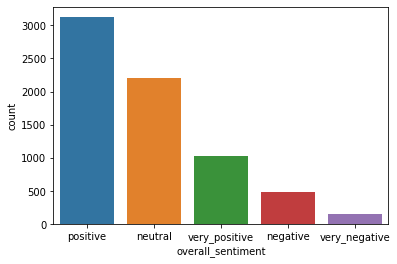

In [ ]:
sns.countplot(df['overall_sentiment'],order = df['overall_sentiment'].value_counts(normalize=True).index)

In [ ]:
df['sarcasm'].value_counts(normalize=True)

general            0.501573
twisted_meaning    0.221253
not_sarcastic      0.220824
very_twisted       0.056350
Name: sarcasm, dtype: float64

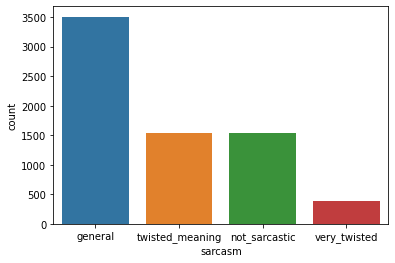

In [ ]:
sns.countplot(df['sarcasm'],order = df['sarcasm'].value_counts(normalize=True).index)

In [ ]:
df['humour'].value_counts(normalize=True)

funny         0.350686
very_funny    0.320080
not_funny     0.236127
hilarious     0.093106
Name: humour, dtype: float64

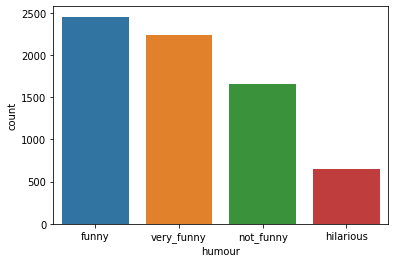

In [ ]:
sns.countplot(df['humour'],order = df['humour'].value_counts(normalize=True).index)

In [ ]:
df['offensive'].value_counts(normalize=True)

not_offensive        0.388015
slight               0.370709
very_offensive       0.209668
hateful_offensive    0.031608
Name: offensive, dtype: float64

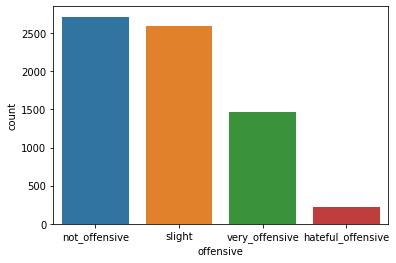

In [ ]:
sns.countplot(df['offensive'],order = df['offensive'].value_counts(normalize=True).index)

In [ ]:
df['motivational'].value_counts(normalize=True)

not_motivational    0.647168
motivational        0.352832
Name: motivational, dtype: float64

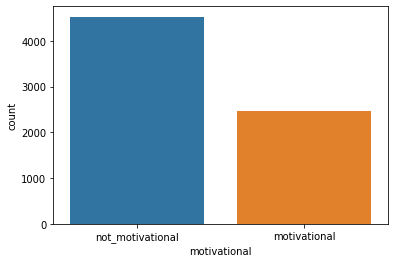

In [ ]:
sns.countplot(df['motivational'],order = df['motivational'].value_counts(normalize=True).index)

In [ ]:
df = df.replace({'humour': {'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious':1},
        'sarcasm': {'not_sarcastic': 0, 'general': 1, 'twisted_meaning': 0, 'very_twisted': 0},
             'offensive': {'not_offensive': 0, 'slight': 2, 'very_offensive': 2, 'hateful_offensive': 2},
            'motivational': {'not_motivational': 0, 'motivational': 1}})

In [ ]:
df.head()


,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,1,1,0,0,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,0,1,0,1,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,1,0,0,0,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,1,0,2,1,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,1,0,2,0,neutral


In [ ]:
df1 = df[['text_corrected', 'overall_sentiment']]

In [ ]:
df1.head()

,text_corrected,overall_sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,The best of #10 YearChallenge! Completed in le...,very_positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text_corrected     6987 non-null   object
 1   overall_sentiment  6992 non-null   object
dtypes: object(2)
memory usage: 109.4+ KB


In [ ]:
df1 = df1.dropna(how = 'any', axis=0) 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 6991
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text_corrected     6987 non-null   object
 1   overall_sentiment  6987 non-null   object
dtypes: object(2)
memory usage: 163.8+ KB


In [ ]:
sent_list = ['very_positive', 'positive', 'neutral', 'negative', 'very_negative']
df1 = df1[df1['overall_sentiment'].isin(sent_list)]
df1.head()

,text_corrected,overall_sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,The best of #10 YearChallenge! Completed in le...,very_positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral


In [ ]:
codes = df1.overall_sentiment.astype('category').cat.codes
df1['sentiment_int'] = codes
codes.unique()

array([4, 2, 1, 0, 3], dtype=int8)

In [ ]:
list_1 = list(pd.unique(df1['sentiment_int'].values))
labels = df1['sentiment_int'].replace({1:1, 2:2, 3:3, 4:4, 0:0})

In [ ]:
df1["text_corrected"] = df1['text_corrected'].str.replace('[^\w\s]','')

In [ ]:
text = df1['text_corrected'].str.lower()

In [ ]:
df1['meme_text'] = text

In [ ]:
df1.head()

,text_corrected,overall_sentiment,sentiment_int,meme_text
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,4,look there my friend lightyear now all sohalik...
1,The best of 10 YearChallenge Completed in less...,very_positive,4,the best of 10 yearchallenge completed in less...
2,Sam Thorne Strippin Follow Follow Saw everyon...,positive,2,sam thorne strippin follow follow saw everyon...
3,10 Year Challenge Sweet Dee Edition,positive,2,10 year challenge sweet dee edition
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,1,10 year challenge with no filter 47 hilarious ...


In [ ]:
df2 = df1[['meme_text', 'sentiment_int']]
df2.head()

,meme_text,sentiment_int
0,look there my friend lightyear now all sohalik...,4
1,the best of 10 yearchallenge completed in less...,4
2,sam thorne strippin follow follow saw everyon...,2
3,10 year challenge sweet dee edition,2
4,10 year challenge with no filter 47 hilarious ...,1


In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df1['sentiment'] = df1['overall_sentiment'].astype('category')

In [ ]:
df1.head()

,text_corrected,overall_sentiment,sentiment_int,meme_text,sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,4,look there my friend lightyear now all sohalik...,very_positive
1,The best of 10 YearChallenge Completed in less...,very_positive,4,the best of 10 yearchallenge completed in less...,very_positive
2,Sam Thorne Strippin Follow Follow Saw everyon...,positive,2,sam thorne strippin follow follow saw everyon...,positive
3,10 Year Challenge Sweet Dee Edition,positive,2,10 year challenge sweet dee edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,1,10 year challenge with no filter 47 hilarious ...,neutral


In [ ]:
X = df2.meme_text
Y = df2.sentiment_int
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
38/38 [==============================] - 8s 53ms/step - loss: 1.8962 - accuracy: 0.3192 - val_loss: 1.9891 - val_accuracy: 0.3123
Epoch 2/10
38/38 [==============================] - 1s 38ms/step - loss: 1.8962 - accuracy: 0.3192 - val_loss: 1.9891 - val_accuracy: 0.3123


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df2['meme_text'].values)
X = tokenizer.texts_to_sequences(df2['meme_text'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 127, 128)          256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 127, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 5)                 985       
                                                                 
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(df2['sentiment_int']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4681, 127) (4681, 5)
(2306, 127) (2306, 5)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
147/147 - 103s - loss: 1.3115 - accuracy: 0.4292 - 103s/epoch - 702ms/step
Epoch 2/10
147/147 - 111s - loss: 1.2686 - accuracy: 0.4499 - 111s/epoch - 754ms/step
Epoch 3/10
147/147 - 126s - loss: 1.2002 - accuracy: 0.4899 - 126s/epoch - 857ms/step
Epoch 4/10
147/147 - 103s - loss: 1.0935 - accuracy: 0.5437 - 103s/epoch - 701ms/step
Epoch 5/10
147/147 - 102s - loss: 0.9956 - accuracy: 0.5932 - 102s/epoch - 692ms/step
Epoch 6/10
147/147 - 104s - loss: 0.8922 - accuracy: 0.6392 - 104s/epoch - 708ms/step
Epoch 7/10
147/147 - 103s - loss: 0.8151 - accuracy: 0.6776 - 103s/epoch - 702ms/step
Epoch 8/10
147/147 - 102s - loss: 0.7525 - accuracy: 0.6928 - 102s/epoch - 696ms/step
Epoch 9/10
147/147 - 101s - loss: 0.6905 - accuracy: 0.7289 - 101s/epoch - 689ms/step
Epoch 10/10
147/147 - 101s - loss: 0.6267 - accuracy: 0.7451 - 101s/epoch - 686ms/step


In [ ]:
n_folds = 3 
cv_scores, model_history = list(), list()
for i in range(n_folds):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state = 42)
    model, test_acc = model.fit(X_test, Y_test, epochs = 10, batch_size = 32)
    #print('>%.3f' % test_acc)
    cv_scores.append(test_acc)
    model_history.append(model)
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

Epoch 1/10
22/22 [==============================] - 16s 710ms/step - loss: 1.7129 - accuracy: 0.3677
Epoch 2/10
22/22 [==============================] - 16s 717ms/step - loss: 1.2487 - accuracy: 0.4564
Epoch 3/10
22/22 [==============================] - 16s 707ms/step - loss: 1.2257 - accuracy: 0.4735
Epoch 4/10
22/22 [==============================] - 16s 715ms/step - loss: 1.2034 - accuracy: 0.4750
Epoch 5/10
22/22 [==============================] - 16s 714ms/step - loss: 1.1628 - accuracy: 0.4878
Epoch 6/10
22/22 [==============================] - 16s 713ms/step - loss: 1.1235 - accuracy: 0.5079
Epoch 7/10
22/22 [==============================] - 16s 710ms/step - loss: 1.0881 - accuracy: 0.5222
Epoch 8/10
22/22 [==============================] - 16s 716ms/step - loss: 1.0168 - accuracy: 0.5651
Epoch 9/10
22/22 [==============================] - 15s 702ms/step - loss: 0.9510 - accuracy: 0.6023
Epoch 10/10
22/22 [==============================] - 16s 720ms/step - loss: 0.8675 - accura

TypeError: ignored

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[-validation_size:]
Y_test = Y_test[-validation_size:]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

22/22 - 2s - loss: 0.7811 - accuracy: 0.7010 - 2s/epoch - 86ms/step
score: 0.78
acc: 0.70


In [ ]:
pos_cnt, neg_cnt, neg_correct, pos_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 3 or np.argmax(Y_validate[x]) == 4:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 3 or np.argmax(Y_validate[x]) == 4:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 357ms/epoch - 357ms/step
1/1 - 0s - 84ms/epoch - 84ms/step
1/1 - 0s - 75ms/epoch - 75ms/step
1/1 - 0s - 99ms/epoch - 99ms/step
1/1 - 0s - 76ms/epoch - 76ms/step
1/1 - 0s - 80ms/epoch - 80ms/step
1/1 - 0s - 82ms/epoch - 82ms/step
1/1 - 0s - 78ms/epoch - 78ms/step
1/1 - 0s - 78ms/epoch - 78ms/step
1/1 - 0s - 79ms/epoch - 79ms/step
1/1 - 0s - 79ms/epoch - 79ms/step
1/1 - 0s - 92ms/epoch - 92ms/step
1/1 - 0s - 86ms/epoch - 86ms/step
1/1 - 0s - 79ms/epoch - 79ms/step
1/1 - 0s - 77ms/epoch - 77ms/step
1/1 - 0s - 87ms/epoch - 87ms/step
1/1 - 0s - 78ms/epoch - 78ms/step
1/1 - 0s - 81ms/epoch - 81ms/step
1/1 - 0s - 81ms/epoch - 81ms/step
1/1 - 0s - 75ms/epoch - 75ms/step
1/1 - 0s - 91ms/epoch - 91ms/step
1/1 - 0s - 78ms/epoch - 78ms/step
1/1 - 0s - 78ms/epoch - 78ms/step
1/1 - 0s - 83ms/epoch - 83ms/step
1/1 - 0s - 82ms/epoch - 82ms/step
1/1 - 0s - 85ms/epoch - 85ms/step
1/1 - 0s - 81ms/epoch - 81ms/step
1/1 - 0s - 76ms/epoch - 76ms/step
1/1 - 0s - 88ms/epoch - 88ms/step
1/1 - 0s - 8

In [ ]:
model.save("LSTM_model.h5")

In [ ]:
!pip install h5py
import h5py
hf = h5py.File('LSTM_model.h5', 'r')


In [ ]:
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [ ]:
weights = model.get_weights()
np.save('lstm.npy', weights)
 


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[ 26,   5,  10,   0,   0],
       [ 66,  95,  46,   0,   3],
       [ 68,  10, 248,   0,   2],
       [ 11,   1,   1,   1,   0],
       [ 50,   4,   7,   0,  45]])

In [ ]:
confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 26,   5,  10,   0,   0],
       [ 66,  95,  46,   0,   3],
       [ 68,  10, 248,   0,   2],
       [ 11,   1,   1,   1,   0],
       [ 50,   4,   7,   0,  45]])

In [ ]:
skf = StratifiedKFold(n_splits=3, random_state = 42, shuffle = True)
skf.get_n_splits(X, Y)

3

In [ ]:
df2['sentiment_int'].count()

6987

In [ ]:
pd.value_counts(df2['sentiment_int'].values.flatten())

2    3123
1    2200
4    1033
0     480
3     151
dtype: int64